# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./Data/train.p"
validation_file= "./Data/valid.p"
testing_file = "./Data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Length of train set is: ",len(X_train))
print("Length of valid set is: ",len(X_valid))
print("Length of test set is: ",len(X_test))

Length of train set is:  34799
Length of valid set is:  4410
Length of test set is:  12630


In [2]:
# Rearrage the datasets
import numpy as np
X_all = X_train
X_all = np.append(X_valid,X_train,axis=0)
X_all = np.append(X_all,X_test,axis=0)
print("X_all = ",len(X_all))

y_all = y_train
y_all = np.append(y_valid,y_train,axis=0)
y_all = np.append(y_all,y_test,axis=0)
print("y_all = ",len(y_all))

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)

'''
import random
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_all))
image = X_all[index].squeeze()
print(y_all[index])
plt.figure(figsize=(1,1))
plt.imshow(image)
'''

# 73% Training data
X_train = X_all[0:44063]
y_train = y_all[0:44063]
print("X_train = ",len(X_train))

# 15% Valication data
X_valid = X_all[44063:50803]
y_valid = y_all[44063:50803]
print("X_valid = ",len(X_valid))

# 2% Test data
X_test = X_all[50804:]
y_test = y_all[50804:]
print("X_test = ",len(X_test))

# Test data for visualization



X_all =  51839
y_all =  51839
X_train =  44063
X_valid =  6740
X_test =  1035


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

17


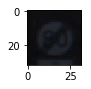

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_valid))
image = X_valid[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

# print(len(image))
# a = (image-128)/128
# print(image[0])
# print(image[0]/128-1)
# print(cv2.mean(image))
print(y_train[index])

<img src="image/mean_variance.png" style="height: 75%;width: 75%; position: relative; right: 5%">

## Problem 1
The first problem involves normalizing the features for your training and test data.

Implement Min-Max scaling in the `normalize()` function to a range of `a=0.1` and `b=0.9`. After scaling, the values of the pixels in the input data should range from 0.1 to 0.9.

Since the raw notMNIST image data is in [grayscale](https://en.wikipedia.org/wiki/Grayscale), the current values range from a min of 0 to a max of 255.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$

*If you're having trouble solving problem 1, you can view the solution [here](https://github.com/udacity/CarND-TensorFlow-Lab/blob/master/solutions.ipynb).*

In [4]:
'''
is_features_normal = False

# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

### DON'T MODIFY ANYTHING BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])

if not is_features_normal:
    X_train = normalize_grayscale(X_train)
    X_test = normalize_grayscale(X_test)
    is_features_normal = True

print('Tests Passed!')

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print(y_train[index])
'''

'\nis_features_normal = False\n\n# Problem 1 - Implement Min-Max scaling for grayscale image data\ndef normalize_grayscale(image_data):\n    """\n    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]\n    :param image_data: The image data to be normalized\n    :return: Normalized image data\n    """\n    # TODO: Implement Min-Max scaling for grayscale image data\n    a = 0.1\n    b = 0.9\n    grayscale_min = 0\n    grayscale_max = 255\n    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )\n\n### DON\'T MODIFY ANYTHING BELOW ###\n# Test Cases\nnp.testing.assert_array_almost_equal(\n    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),\n    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,\n     0.125098039216, 0.128235294118, 0.13137254902, 0.9],\n    decimal=3)\nnp.testing.assert_array_almost_equal(\n    normalize_grayscale(np.array([0, 1

In [5]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 22
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x24.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')# + conv1_b
    conv1   = tf.nn.bias_add(conv1,conv1_b)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x24. Output = 14x14x24.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x48.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')# + conv2_b
    conv2   = tf.nn.bias_add(conv2,conv2_b)
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x48. Output = 5x5x48.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x48. Output = 1200.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1200. Output = 800.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W)# + fc1_b
    fc1   = tf.nn.bias_add(fc1,fc1_b)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 360.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 360), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(360))
    fc2    = tf.matmul(fc1, fc2_W)# + fc2_b
    fc2    = tf.nn.bias_add(fc2,fc2_b)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # dropout
    # keep_prob = tf.placeholder(tf.float32)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 360. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(360, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W)# + fc3_b
    logits = tf.nn.bias_add(logits,fc3_b)
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

                        
        test_accuracy = evaluate(X_train[0:1000], y_train[0:1000]) # X_train = X_all[0:44063]
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
        validation_accuracy = evaluate(X_valid, y_valid)
        # print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.904
Validation Accuracy = 0.878

EPOCH 2 ...
Test Accuracy = 0.970
Validation Accuracy = 0.946

EPOCH 3 ...
Test Accuracy = 0.979
Validation Accuracy = 0.963

EPOCH 4 ...
Test Accuracy = 0.970
Validation Accuracy = 0.953

EPOCH 5 ...
Test Accuracy = 0.985
Validation Accuracy = 0.968

EPOCH 6 ...
Test Accuracy = 0.995
Validation Accuracy = 0.976

EPOCH 7 ...
Test Accuracy = 0.984
Validation Accuracy = 0.974

EPOCH 8 ...
Test Accuracy = 0.990
Validation Accuracy = 0.974

EPOCH 9 ...
Test Accuracy = 0.991
Validation Accuracy = 0.975

EPOCH 10 ...
Test Accuracy = 0.995
Validation Accuracy = 0.970

EPOCH 11 ...
Test Accuracy = 0.990
Validation Accuracy = 0.972

EPOCH 12 ...
Test Accuracy = 0.999
Validation Accuracy = 0.986

EPOCH 13 ...
Test Accuracy = 0.994
Validation Accuracy = 0.980

EPOCH 14 ...
Test Accuracy = 0.991
Validation Accuracy = 0.977

EPOCH 15 ...
Test Accuracy = 0.989
Validation Accuracy = 0.973

EPOCH 16 ...
Test Accuracy = 0.990
V

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [13]:
'''
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
'''

'\nwith tf.Session() as sess:\n    saver.restore(sess, tf.train.latest_checkpoint(\'.\'))\n\n    test_accuracy = evaluate(X_test, y_test)\n    print("Test Accuracy = {:.3f}".format(test_accuracy))\n'